In [ ]:
url = 'https://drive.google.com/file/d/1UbWXvQmXAPpOPzkhHgLc2PXKG19kgBs4/view?usp=share_link'
file_id = url.split('/')[-2]
read_url='https://drive.google.com/uc?id=' + file_id

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, classification_report

#importing libraries for machine learning
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv(read_url)
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    float64
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Caffeine (mg)              241 non-null    object 

In [ ]:
df = df.dropna()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
model = ols('Calories ~ Beverage_prep', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Beverage_prep,8.437392e+05,12.0,9.455535,8.147053e-15
Residual,1.695414e+06,228.0,NaN,NaN


DEPENDENT

In [ ]:
df["Beverage_prep"].unique()

array(['Short', 'Tall', 'Grande', 'Venti', 'Short Nonfat Milk', '2% Milk',
       'Soymilk', 'Tall Nonfat Milk', 'Grande Nonfat Milk',
       'Venti Nonfat Milk', 'Solo', 'Doppio', 'Whole Milk'], dtype=object)

In [ ]:
df_short=df.loc[df.Beverage_prep == 'Short']
df_tall=df.loc[df.Beverage_prep == 'Tall']


In [ ]:
correlation_matrix = df.corr()

<ipython-input-11-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


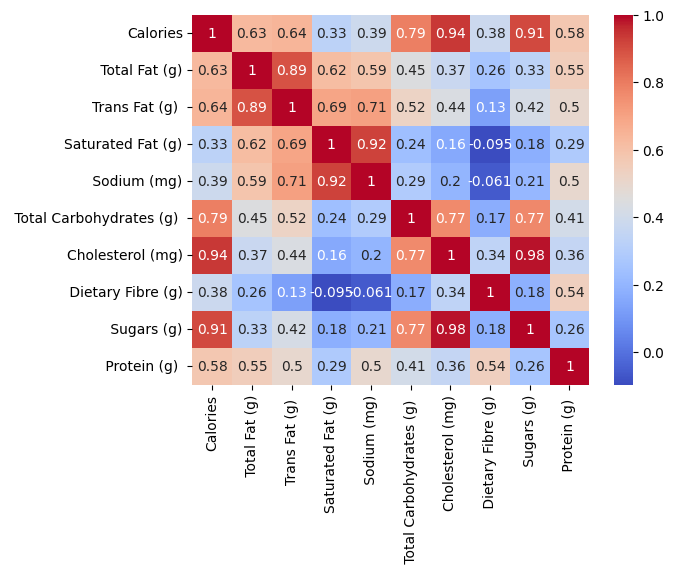

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df.head(1)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,175


In [ ]:
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Caffeine (mg)'],
      dtype='object')

In [ ]:
df2= df[[' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)']]

In [ ]:
pca = PCA(n_components=1)  # Specify the number of components you want after merging
merged_column= pca.fit_transform(df2)
df['Total Fat'] = merged_column

In [ ]:
df3= df[[' Sugars (g)','Calories',' Total Carbohydrates (g) ']]

In [ ]:
pca = PCA(n_components=1)  # Specify the number of components you want after merging
merged_column= pca.fit_transform(df3)
df['Calories'] = merged_column

In [ ]:
df3= df[[' Sugars (g)','Calories',' Total Carbohydrates (g) ']]

In [ ]:
x = df[['Total Fat'," Dietary Fibre (g)",' Sodium (mg)',"Calories"," Protein (g) "]]
y=df["Beverage_prep"]

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42)

In [ ]:
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [ ]:
classifier= RandomForestClassifier(n_estimators= 75, criterion="entropy")
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=75)

In [ ]:
y_pred= classifier.predict(x_test)


In [ ]:
cm= confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8367346938775511


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
svm = SVC()
svm.fit(x_train, y_train)


SVC()

In [ ]:
y_pred = svm.predict(x_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6938775510204082


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(x_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5714285714285714


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()

# Fitting the model on the training data
clf.fit(x_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(x_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7551020408163265


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Predict on the test set
y_pred = logreg.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7551020408163265
